<a href="https://colab.research.google.com/github/Francisco-Italo/ml2023-Italo-Moraes/blob/master/Atividades/07-MLP-Titanic/Ativ_MLP_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
import pandas as pd

df_train = pd.read_csv("/content/drive/MyDrive/titanic-train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/titanic-test.csv")

In [120]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [121]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [122]:
print(f"DataFrame shape : {df_train.shape}\n=================================")
print(f"DataFrame info : {df_train.info()}\n=================================")
print(f"DataFrame columns : {df_train.columns}\n=================================")
print(f"The type of each column : {df_train.dtypes}\n=================================")
print(f"How much missing value in every column : {df_train.isna().sum()}\n=================================")

DataFrame shape : (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
DataFrame info : None
DataFrame columns : Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
The type of each colu

In [123]:
mean_value = df_train['Age'].mean()
df_train['Age'].fillna(mean_value, inplace=True)
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [124]:
df_train.drop(columns=['Name','Ticket','Cabin','Embarked'],inplace=True)
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


In [125]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)

sex_data = df_train['Sex'].values.reshape(-1, 1)
sex_encoded = encoder.fit_transform(sex_data)
df_encoded = pd.DataFrame(sex_encoded, columns=['Female', 'Male'])
df_train = pd.concat([df_train, df_encoded], axis=1)
df_train.drop('Sex', axis=1, inplace=True)

print(df_train.head())

   PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  Female  Male
0            1         0       3  22.0      1      0   7.2500     0.0   1.0
1            2         1       1  38.0      1      0  71.2833     1.0   0.0
2            3         1       3  26.0      0      0   7.9250     1.0   0.0
3            4         1       1  35.0      1      0  53.1000     1.0   0.0
4            5         0       3  35.0      0      0   8.0500     0.0   1.0


In [126]:
from sklearn.model_selection import train_test_split, cross_val_score

X = df_train.drop('Survived', axis=1)
y = df_train['Survived']

X_train, X_val, y_train, y_val = train_test_split(X, y,
test_size=0.1, random_state=42)

In [127]:
print(f"DataFrame shape : {df_test.shape}\n=================================")
print(f"DataFrame info : {df_test.info()}\n=================================")
print(f"DataFrame columns : {df_test.columns}\n=================================")
print(f"The type of each column : {df_test.dtypes}\n=================================")
print(f"How much missing value in every column : {df_test.isna().sum()}\n=================================")

DataFrame shape : (418, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
DataFrame info : None
DataFrame columns : Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
The type of each column : PassengerId      int64
Pclass           int64
Nam

In [128]:
mean_value = df_test['Age'].mean()
df_test['Age'].fillna(mean_value, inplace=True)

In [129]:
encoder = OneHotEncoder(sparse_output=False)

sex_data = df_test['Sex'].values.reshape(-1, 1)
sex_encoded = encoder.fit_transform(sex_data)
df_encoded = pd.DataFrame(sex_encoded, columns=['Female', 'Male'])
df_test = pd.concat([df_test, df_encoded], axis=1)
df_test.drop('Sex', axis=1, inplace=True)

In [130]:
df_test.drop(columns=['Name','Ticket','Cabin','Embarked'],inplace=True)

In [131]:
print(df_test.head())

   PassengerId  Pclass   Age  SibSp  Parch     Fare  Female  Male
0          892       3  34.5      0      0   7.8292     0.0   1.0
1          893       3  47.0      1      0   7.0000     1.0   0.0
2          894       2  62.0      0      0   9.6875     0.0   1.0
3          895       3  27.0      0      0   8.6625     0.0   1.0
4          896       3  22.0      1      1  12.2875     1.0   0.0


## Criação e treinamentodo modelo MLP

In [ ]:
pip install tensorflow

In [132]:
from tensorflow.keras.metrics import SparseCategoricalCrossentropy, BinaryCrossentropy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()

In [133]:
model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))

In [138]:
model.add(Dense(32, activation='relu'))

In [142]:
model.add(Dense(64, activation='relu'))

In [143]:
model.add(Dense(1, activation='softmax'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(patience=100)

In [136]:
import matplotlib.pyplot as plt

## Uma camada intermediária (16 neurônios)

Epoch 1/300
81/81 [==============================] - 1s 3ms/step - loss: 35.6519 - accuracy: 0.3820 - val_loss: 2.7215 - val_accuracy: 0.4000
Epoch 2/300
81/81 [==============================] - 0s 1ms/step - loss: 1.2155 - accuracy: 0.3820 - val_loss: 1.5962 - val_accuracy: 0.4000
Epoch 3/300
81/81 [==============================] - 0s 2ms/step - loss: 0.7950 - accuracy: 0.3820 - val_loss: 1.6324 - val_accuracy: 0.4000
Epoch 4/300
81/81 [==============================] - 0s 2ms/step - loss: 0.7786 - accuracy: 0.3820 - val_loss: 0.7883 - val_accuracy: 0.4000
Epoch 5/300
81/81 [==============================] - 0s 1ms/step - loss: 0.7258 - accuracy: 0.3820 - val_loss: 1.3881 - val_accuracy: 0.4000
Epoch 6/300
81/81 [==============================] - 0s 1ms/step - loss: 0.7370 - accuracy: 0.3820 - val_loss: 1.3015 - val_accuracy: 0.4000
Epoch 7/300
81/81 [==============================] - 0s 2ms/step - loss: 0.6879 - accuracy: 0.3820 - val_loss: 1.1214 - val_accuracy: 0.4000
Epoch 8/300


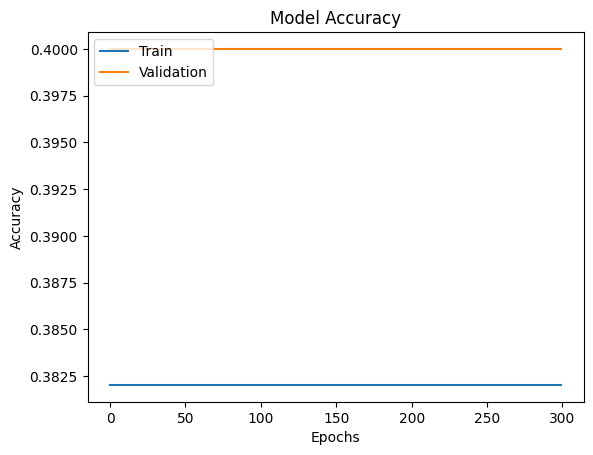

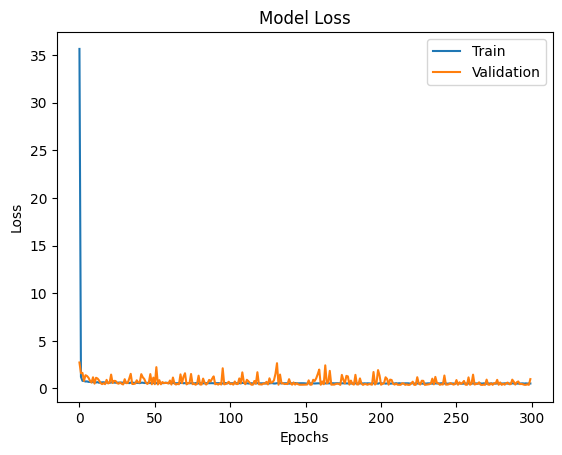

In [137]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=300, batch_size=10, callbacks=[early_stopping])

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

## Duas camadas intermediários (16 e 32 neurônios)

Epoch 1/300
81/81 [==============================] - 1s 3ms/step - loss: 0.6679 - accuracy: 0.3820 - val_loss: 0.6731 - val_accuracy: 0.4000
Epoch 2/300
81/81 [==============================] - 0s 2ms/step - loss: 0.6664 - accuracy: 0.3820 - val_loss: 0.6732 - val_accuracy: 0.4000
Epoch 3/300
81/81 [==============================] - 0s 1ms/step - loss: 0.6658 - accuracy: 0.3820 - val_loss: 0.6732 - val_accuracy: 0.4000
Epoch 4/300
81/81 [==============================] - 0s 2ms/step - loss: 0.6656 - accuracy: 0.3820 - val_loss: 0.6743 - val_accuracy: 0.4000
Epoch 5/300
81/81 [==============================] - 0s 1ms/step - loss: 0.6657 - accuracy: 0.3820 - val_loss: 0.6740 - val_accuracy: 0.4000
Epoch 6/300
81/81 [==============================] - 0s 1ms/step - loss: 0.6657 - accuracy: 0.3820 - val_loss: 0.6747 - val_accuracy: 0.4000
Epoch 7/300
81/81 [==============================] - 0s 2ms/step - loss: 0.6655 - accuracy: 0.3820 - val_loss: 0.6732 - val_accuracy: 0.4000
Epoch 8/300
8

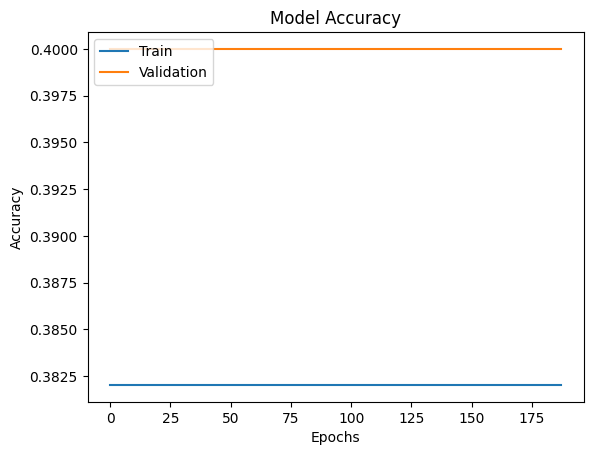

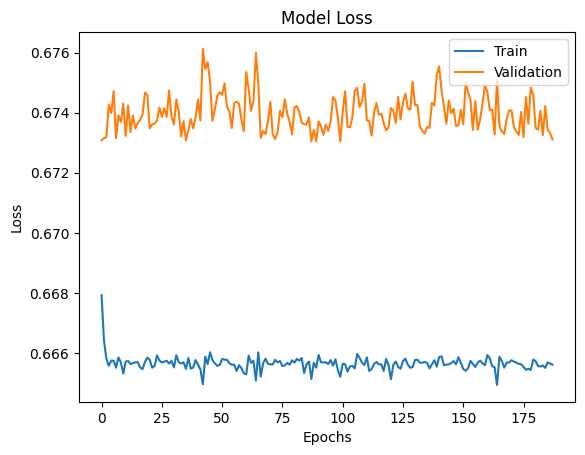

In [141]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=300, batch_size=10, callbacks=[early_stopping])

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

## Três camadas intermediárias (16, 32 e 64 neurônios)

Epoch 1/300
81/81 [==============================] - 1s 3ms/step - loss: 0.6745 - accuracy: 0.3820 - val_loss: 0.6737 - val_accuracy: 0.4000
Epoch 2/300
81/81 [==============================] - 0s 2ms/step - loss: 0.6658 - accuracy: 0.3820 - val_loss: 0.6732 - val_accuracy: 0.4000
Epoch 3/300
81/81 [==============================] - 0s 2ms/step - loss: 0.6661 - accuracy: 0.3820 - val_loss: 0.6731 - val_accuracy: 0.4000
Epoch 4/300
81/81 [==============================] - 0s 2ms/step - loss: 0.6660 - accuracy: 0.3820 - val_loss: 0.6730 - val_accuracy: 0.4000
Epoch 5/300
81/81 [==============================] - 0s 2ms/step - loss: 0.6662 - accuracy: 0.3820 - val_loss: 0.6731 - val_accuracy: 0.4000
Epoch 6/300
81/81 [==============================] - 0s 2ms/step - loss: 0.6660 - accuracy: 0.3820 - val_loss: 0.6752 - val_accuracy: 0.4000
Epoch 7/300
81/81 [==============================] - 0s 2ms/step - loss: 0.6662 - accuracy: 0.3820 - val_loss: 0.6739 - val_accuracy: 0.4000
Epoch 8/300
8

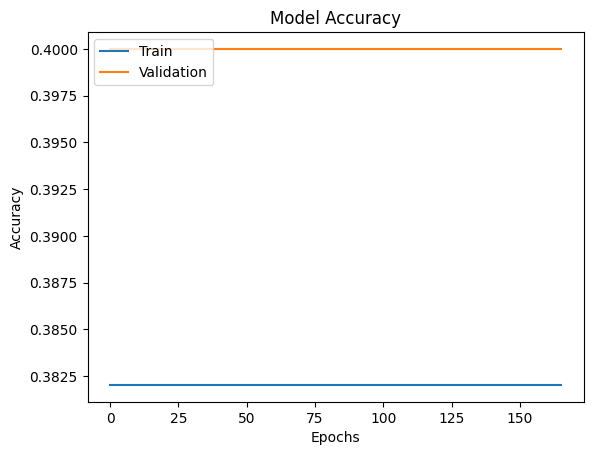

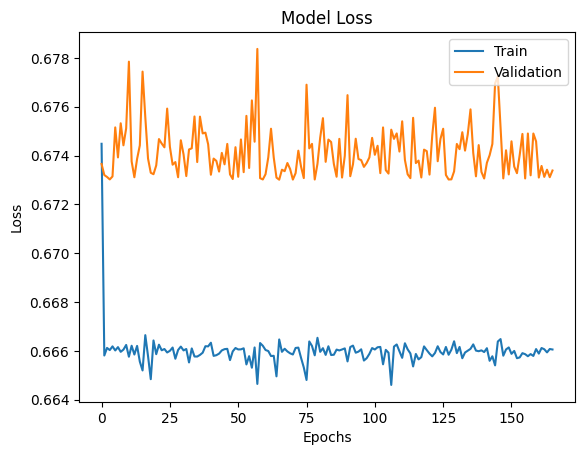

In [144]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=300, batch_size=10, callbacks=[early_stopping])

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

## Criação de arquivo csv com as predições

In [145]:
predictions = model.predict(df_test)
predictions_df = pd.DataFrame(predictions, columns=['Survived'])
predictions_df.to_csv('predictions.csv', index=False)

out_df = pd.read_csv('predictions.csv')
out_df.head()

14/14 [==============================] - 0s 1ms/step


,Survived
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
